In [198]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [199]:
L = 20



In [200]:
Matrice  = np.zeros((L,L))
(long,larg) = Matrice.shape
Matrice


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

## Initialisation du foyer et des cases neutres


In [201]:
def foyer():
    i = randint(2,L-2)
    j = randint(2,L-2)
    Matrice[i,j] = Matrice[i,j] + 1
    return (i, j)
    print(i, j)

    

In [202]:

i,j=foyer()


In [203]:
def case_neutre(Matrice,i,j):
    for h in range(35):
        i_ = randint(2,L-2)
        j_ = randint(2,L-2)
        if i != i_ and j!= j_ :
            Matrice[i_,j_] = -1


# Matrice de probabilité


In [204]:
def proba_feu(rayon, alpha=1.0):
    p = 1.0 / ((1.0 + rayon) ** alpha)
    return p

<IPython.core.display.Javascript object>


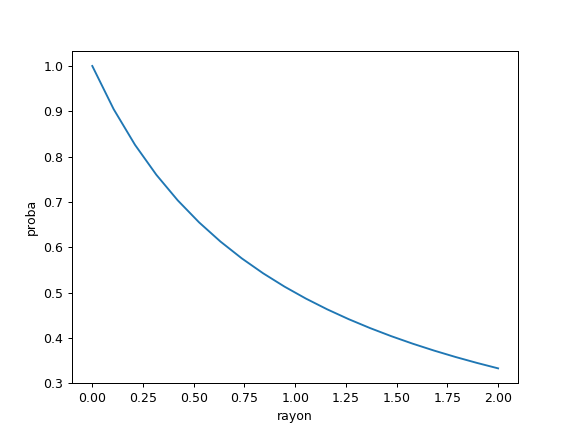

In [205]:
r_min = 0.0
r_max = 2.0
rayons = np.linspace(r_min, r_max, num=20)
probas_feu = np.array([proba_feu(r) for r in rayons])

plt.plot(rayons, probas_feu)
plt.xlabel("rayon")
plt.ylabel("proba")

plt.show()

In [206]:
print(proba_feu(0.0))
print(proba_feu(1.0))
print(proba_feu(2.0))

1.0
0.5
0.3333333333333333


In [207]:
def filter_proba(p):
    p = p
    return p

In [208]:
def matrice_proba(ventx, venty):
    p = np.zeros((3, 3))
    i_0, j_0 = 1.0, 2.0
    # i_1, j_1 = ?, ?  # dépend de ventx venty
    for i in range(0, 3):
        for j in range(0, 3):
            rayon = np.sqrt((i - i_0)**2 + (j - j_0)**2)
            p[i, j] = proba_feu(rayon)
    return p

In [209]:
p = matrice_proba(0.0, 0.0)
print(p)

[[ 0.30901699  0.41421356  0.5       ]
 [ 0.33333333  0.5         1.        ]
 [ 0.30901699  0.41421356  0.5       ]]


In [210]:
def is_in_fire(cell):
    return 1 <= cell < 2

In [211]:
def propa(ancienne_matrice,nouvelle_matrice,p,i,j):
    u=1
    if u==1:
        nouvelle_matrice = ancienne_matrice
        u=8
    if is_in_fire(ancienne_matrice[i,j]):  # i.e. elle est en feu        
        for di in [-1, 0 ,+1]:
            for dj in [-1, 0,+1]:
                if ancienne_matrice[i +di,j +dj] == 0: # si arbre sain
                    x = np.random.binomial(1, p[di+1, dj+1])
                    nouvelle_matrice[di +i, dj +j] = x
                
        nouvelle_matrice[i,j] = nouvelle_matrice[i,j] + (1/2)
    else :
        ancienne_matrice[i,j] = nouvelle_matrice[i,j]  # Copier l'ancienne matrice dans la nouvelle
    return nouvelle_matrice
    
    

In [212]:
def affiche_matrice(Matrice):
    (n,m) = Matrice.shape
    for i in range(2,n-1) :
        for j in range(2,m-1) :
            if  Matrice[i,j]== 0  :
                print("A", end="")
            elif Matrice[i, j] >= 1 and Matrice[i, j] < 2 :
                print("F", end="")
            elif Matrice[i, j] >= 2 :
                print(".", end="")
            elif Matrice[i,j] < 0 :
                print(" ", end="")
        print("")

In [213]:
def parcourir_matrice(matrice):
    u=1
    
        
    for k in range(2,L-1):
        for v in range(2,L-1): 
            if matrice[k,v]>=1 and matrice[k,v]<2:
                u=3
            
    return u
                

In [222]:
Matrice  = np.zeros((L,L))
(long,larg) = Matrice.shape
i,j = foyer()
new_mat= Matrice

In [223]:
parcourir_matrice(Matrice)


3

In [224]:

def next_step(Matrice):
    #new_mat = Matrice
    #while parcourir_matrice(Matrice)== 3:
        #i=2
    for i in range(2,L-1):
        for j in range(2,L-1): 
            propa(Matrice, new_mat,p ,i ,j)
                #parcourir_matrice(Matrice)
                
    print(new_mat)
    return new_mat

In [225]:
Matrice  = np.zeros((L,L))
(long,larg) = Matrice.shape
i,j = foyer()
case_neutre(Matrice,i,j)
def simulation(Matrice):
    nb_pas = 30
    affiche_matrice(Matrice)
    print("")
    for k in range (nb_pas):
        Matrice = next_step(Matrice)
        affiche_matrice(Matrice)
        print("")
simulation(Matrice)

AAAAAAAAAAAAAAAAA
AAA AAAAA AAAA AA
AAAAAAAAAAAAAAAA 
AAAAAAAAAAAAAAAAA
AA AAAA AAAAAAAAA
AAAAAAAA AAAAAAAA
A AAAAAAA AAAAAAA
 AAAAAA AAAAAAA A
AAAAAAAA AAAAAAAA
AAA  AAAAAA AAA A
AAAAAFAAAAAAAAAAA
 AAAAAAAAAAAAAAAA
AAA AAAAAA AAAAAA
AAAA AAAAAAAAAAAA
   AAAAAAAA  AAAA
A AAAAAAA AAAAAAA
AAAAAAAAAAAAAAAAA

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   1.   0.   1.   1.   1.   1

.................
.................
.................
.................
.................
.................

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   1.   1.   1.   1.   1.
   1.   1.   1.   0.   1. ]
 [ 0.   0.   0.   0.   0.   1.   1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
   1.5  1.5  1.5  1.5  1.5  1. ]
 [ 0.   0.   1.   1.5  1.5  1.5  1.5  2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   1. ]
 [ 0.   1.   1.5  2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   1. ]
 [ 0.   1.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   1. ]
 [ 0.   1.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   1. ]
 [ 0.   1.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   1. ]
 [ 0.   1.   2.   2.   2.   2.   2.   2.   2.   2.   2.   

.................
.................
.................
.................

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   

In [195]:

import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML
import numpy as np
%matplotlib notebook
%matplotlib notebook

In [196]:
from matplotlib.colors import ListedColormap, Normalize

In [197]:
colors = ["blue",   #gris (cendre)
          "green",   # bleu (espace d'eau)
          "red",  # Vert (espace d'eau)
          "grey"]    # Rouge (enfeu)
cmap = ListedColormap(colors)

In [115]:
import matplotlib.patches as mpatches

In [116]:
couleur_saint = "green"
couleur_enfeu = "red"
couleur_cendre = "grey"
colors = ["blue",couleur_saint, couleur_saint,couleur_enfeu, couleur_cendre]
cmap = ListedColormap(colors)

patch1 = mpatches.Patch(color=couleur_saint, label='saint')
patch2 = mpatches.Patch(color=couleur_cendre, label='cendre')
patch3 = mpatches.Patch(color=couleur_enfeu, label='enfeu')
patch4 = mpatches.Patch(color="blue",label='eau')

<IPython.core.display.Javascript object>


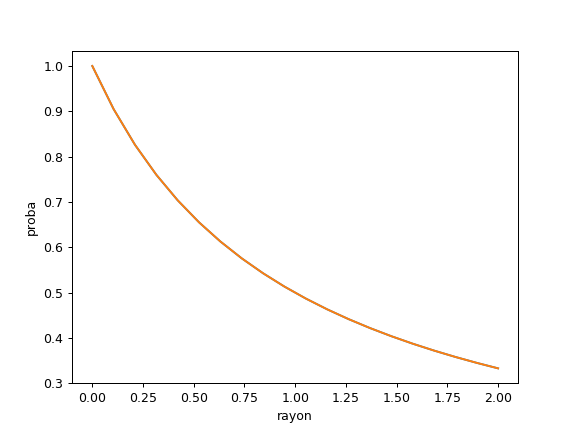

NameError: name 'results' is not defined

In [117]:
fig = plt.figure()
norm = Normalize(vmin = -1, vmax = 2, clip = False)
im=plt.imshow(results[0], interpolation = 'nearest',
              cmap = cmap,
              norm = norm)
plt.xticks([]), plt.yticks([])
plt.title("Simulation d'une feu de foret")
plt.legend(handles=[patch1, patch2, patch3,patch4],bbox_to_anchor=(1, 1, 0., 0), loc="upper left")

In [ ]:
def update(i):
    im.set_array(results[i])
    return [im]

ani = anim.FuncAnimation(fig, update, interval=300)
plt.show()
